# Importe Data

In [ ]:
import pandas as pd
df = pd.read_csv('Sleep_health_and_lifestyle_dataset(in).csv')
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Tranformaciones iniciales

Se realiza el cambio de vacíos por la nueva marca "No Sleep Disorder"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Transformación de Sleep Disorder
df['Sleep Disorder'].fillna('No Sleep Disorder', inplace=True)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Se procesa la columna "Bloos Pressure" para dividir las mediciones Sistolicas y Diastolicas de los datos para poder tener un mejor control de esta categoría.

In [ ]:
# Procesamiento 'Blood Pressure'
df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic Pressure'] = pd.to_numeric(df['Systolic Pressure'])
df['Diastolic Pressure'] = pd.to_numeric(df['Diastolic Pressure'])

display(df.head())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep Disorder,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


Implementación de estadísticas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Asumiendo que tus datos están en un DataFrame llamado 'df'
# df = pd.read_csv('tu_archivo.csv')

# === 1. Definir la variable Objetivo (y) y las Características (X) ===

# La variable que queremos predecir
target = 'Quality of Sleep'

# Todas las demás columnas son características potenciales
# Excluimos la variable objetivo
X = df.drop(target, axis=1)
y = df[target]


# === 2. Identificar las columnas para cada transformación ===

# Columnas a eliminar porque no son predictivas o son redundantes
drop_cols = ['Person ID', 'Blood Pressure']

# Columnas categóricas que necesitan One-Hot Encoding
categorical_cols = [
    'Gender',
    'Occupation',
    'BMI Category',
    'Sleep Disorder'
]

# Columnas numéricas que necesitan escalado
# Filtramos las que no vamos a usar (drop_cols) ni a codificar (categorical_cols)
# Esto selecciona automáticamente todas las demás columnas numéricas
numerical_cols = [
    'Age',
    'Sleep Duration',
    'Physical Activity Level',
    'Stress Level',
    'Heart Rate',
    'Daily Steps',
    'Systolic Pressure',
    'Diastolic Pressure'
]

# === 3. Crear el Pipeline de Preprocesamiento ===

# Crear el transformador para variables numéricas
# StandardScaler las estandariza (media 0, desviación 1)
numeric_transformer = StandardScaler()

# Crear el transformador para variables categóricas
# OneHotEncoder crea nuevas columnas para cada categoría
# handle_unknown='ignore' evita errores si aparecen nuevas categorías en datos futuros
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Usar ColumnTransformer para aplicar las transformaciones correctas a las columnas correctas
# 'drop' para las columnas que no usamos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('drop', 'drop', drop_cols)
    ],
    remainder='passthrough' # Mantiene columnas no especificadas (aunque aquí especificamos todas)
)

# === 4. Aplicar el preprocesamiento ===

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el preprocesador SÓLO con los datos de entrenamiento
# y luego transformar ambos conjuntos (entrenamiento y prueba)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Opcional: Obtener los nombres de las nuevas columnas (después del One-Hot)
# Esto es útil para interpretar el modelo
cat_features_out = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
processed_columns = numerical_cols + list(cat_features_out)

# Convertir los datos procesados de nuevo a DataFrames (opcional, pero útil para ver)
X_train_processed_df = pd.DataFrame(X_train_processed, columns=processed_columns)

print("Datos procesados listos para el modelo:")
X_train_processed_df.head()

Datos procesados listos para el modelo:


,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure,Gender_Female,Gender_Male,...,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_No Sleep Disorder,Sleep Disorder_Sleep Apnea
0,0.055811,-0.833457,-0.728644,0.956601,0.481081,-0.554643,0.186918,0.050678,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,-1.111141,-1.468533,-1.450369,1.522984,0.481081,-1.180447,-0.448177,-0.746830,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.877751,0.436694,-0.006920,-0.176166,-0.014076,0.696966,-1.083272,-0.746830,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.922934,1.325801,0.714805,-1.308933,-0.509234,0.071162,1.457107,1.645692,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.577922,-0.833457,-0.969219,0.956601,2.461710,-1.806251,0.440955,0.369681,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_processed, y_train)

print("Model trained successfully!")

Model trained successfully!


Accuracy: 0.9867

Classification Report:
              precision    recall  f1-score   support

           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         1
           6       0.96      1.00      0.98        26
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        12

    accuracy                           0.99        75
   macro avg       0.99      0.92      0.94        75
weighted avg       0.99      0.99      0.98        75



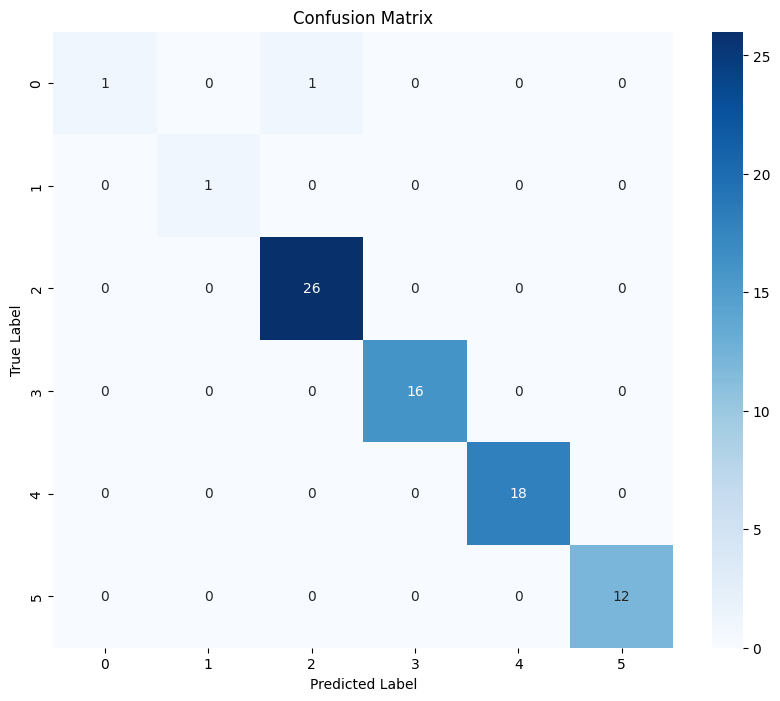

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test_processed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()